In [1]:
import cv2
from PIL import Image
import numpy as np
from tqdm import tqdm

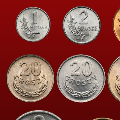

In [2]:
img = cv2.imread('Monety_kolor.bmp')[:400,:400,...]
img = cv2.resize(img, (120,120))
Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
data = img.reshape(-1, 3)

In [6]:
def calculate_relations(data):
    n = data.shape[0]
    m1 = np.stack([data for _ in range(n)], axis=0).astype(np.float32)
    m2 = np.stack([data for _ in range(n)], axis=1).astype(np.float32)
    diff = m1 - m2
    fuzzy_rels = np.linalg.norm(diff, axis=-1)
    return fuzzy_rels / np.max(fuzzy_rels)

In [7]:
fuzzy_rels = calculate_relations(data)

In [20]:
THRESHOLD = .8

rels = fuzzy_rels < THRESHOLD
clusters = np.unique(rels, axis=0, return_counts=True)

In [21]:
clusters[1]

array([   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    3,    1,
          1,    1,    1,    1,    2,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    3,    1,    1,    1,    1,    1,    1,
          2,    1,    2,    2,    1,    1,    1,    3,    1,    1,    1,
          1,    1,    3,    1,    1,    1,    1,    1,    1,    4,    1,
          1,    4,    1,    1,    1,    1,    1,    4,    1,    1,    1,
          1,    1,    1,    2,    1,    1,    1,    2,    1,    3,    1,
          1,    1,    1,    1,    1,    1,    1,    2,    1,    3,    1,
          1,    1,    1,    3,    1,    3,    1,    1,    2,    1,    2,
          1,    1,    1,    1,    1,    5,    1,    1,    1,    2,    1,
          1,    1,    1,    1,    1,    1,    1,    2,    1,    1,    4,
          1,    1,    3,    1,    1,    1,    4,    1,    5,    1,    7,
          7,    2,    5,    7,    6,    2,    9,   

In [22]:
idx = np.zeros(data.shape[0])
for i in tqdm(range(clusters[0].shape[0])):
    idx[np.all(rels==clusters[0][i],axis=1)] = i

100%|██████████| 444/444 [01:22<00:00,  5.40it/s]


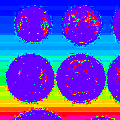

In [23]:
segmented = idx.reshape(img.shape[:2]).astype(np.uint8)
out_img = cv2.applyColorMap(segmented, cv2.COLORMAP_HSV)
Image.fromarray(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))